# **Dataset**

https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction


#  Diabetes Exploratory Data Analysis (Python)

## Project Overview
This project performs exploratory data analysis (EDA) on a diabetes dataset to understand
key health indicators and their relationship with diabetes diagnosis.

The analysis focuses on data quality, distribution patterns, and insights derived from
visual exploration using Python.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('Diabetes_prediction.csv')

# Preview data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [47]:
# Basic dataset info
df.shape


(1000, 9)

In [48]:
# Column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [49]:
# Check missing values
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diagnosis,0


In [50]:
# Check duplicate rows
df.duplicated().sum()


np.int64(0)

In [51]:
# Statistical summary for numerical columns
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [52]:
# Unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


## Day 9 – Data Understanding & Initial Observations

- The dataset contains **1000 rows and 9 columns**.
- **No columns have missing values**; all features have 1000 non-null entries.
- **Duplicate rows:** 0 (no duplicates found in the dataset).
- All columns are **numerical**:
  - Integer features: `Pregnancies`, `Diagnosis`
  - Continuous features: `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`,
    `DiabetesPedigreeFunction`, `Age`
- The target variable `Diagnosis` is binary (0 = non-diabetic, 1 = diabetic).
- Some numerical columns contain **unrealistic or extreme values**, such as:
  - Negative values in `Insulin`
  - Negative values in `Age`
- Several features (e.g., `Insulin`, `Glucose`, `BMI`) show **wide ranges and potential skewness**,
  which may require further investigation and handling during later EDA steps.
- No categorical columns are present in this dataset.


In [53]:
# Replace invalid negative values with NaN
df_clean = df.copy()

df_clean.loc[df_clean['Insulin'] < 0, 'Insulin'] = np.nan
df_clean.loc[df_clean['Age'] < 0, 'Age'] = np.nan


In [54]:
df_clean.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,127
BMI,0
DiabetesPedigreeFunction,0
Age,2
Diagnosis,0


In [55]:
# Impute missing values using median
df_clean['Insulin'] = df_clean['Insulin'].fillna(df_clean['Insulin'].median())
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

In [56]:
df_clean.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,101.814017,25.433600,0.449383,43.370699,0.30600
std,1.354398,19.470730,13.882017,1.173807,57.171186,3.690223,0.199334,14.329989,0.46106
min,0.000000,30.571402,31.401487,19.369987,0.101435,13.548818,0.100037,2.082077,0.00000
25%,1.000000,86.145927,62.795447,22.501591,61.319564,23.022715,0.283376,33.567786,0.00000
50%,2.000000,99.458362,71.909588,23.275225,97.406911,25.455649,0.448219,43.644349,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [57]:
# Cap extreme outliers using IQR method
for col in ['Glucose', 'BloodPressure', 'BMI']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower, upper)


Data Cleaning

- Identified unrealistic negative values in `Insulin` and `Age`.
- Replaced invalid negative values with NaN.
- Imputed missing values using median to preserve distribution.
- Lightly capped extreme outliers for selected features to improve visualization.
- No rows were dropped during cleaning to retain full dataset size.
- Final cleaned dataset contains 1000 rows and 9 columns.


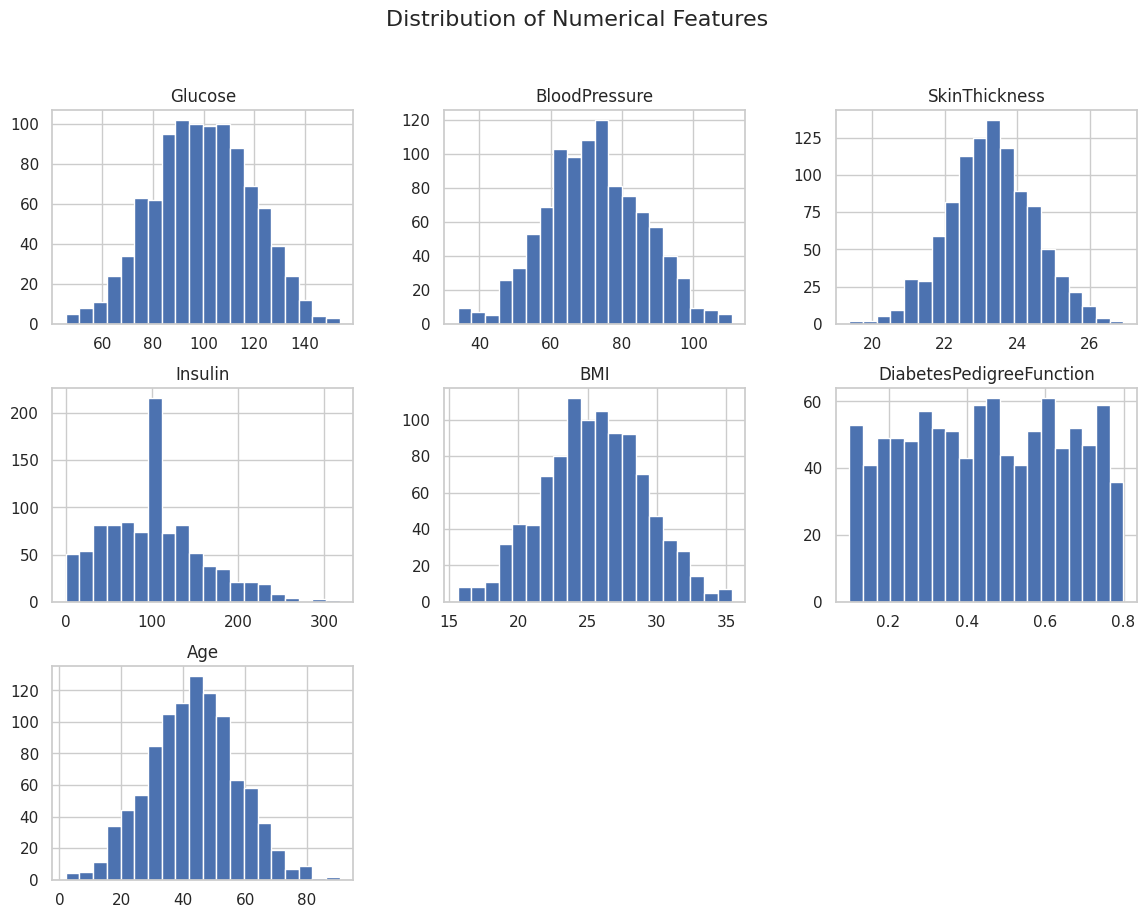

In [58]:
num_cols = ['Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_clean[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


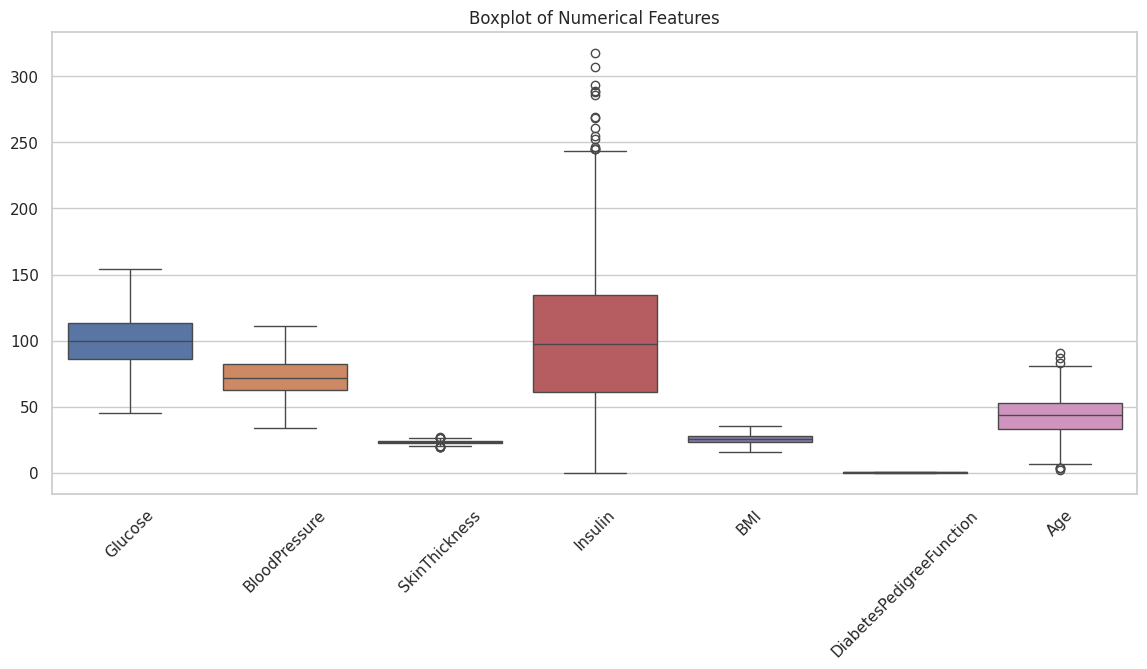

In [59]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[num_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()


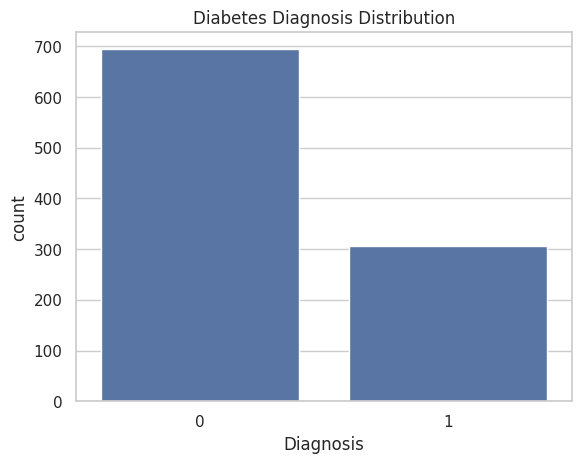

In [60]:
sns.countplot(x='Diagnosis', data=df_clean)
plt.title('Diabetes Diagnosis Distribution')
plt.show()


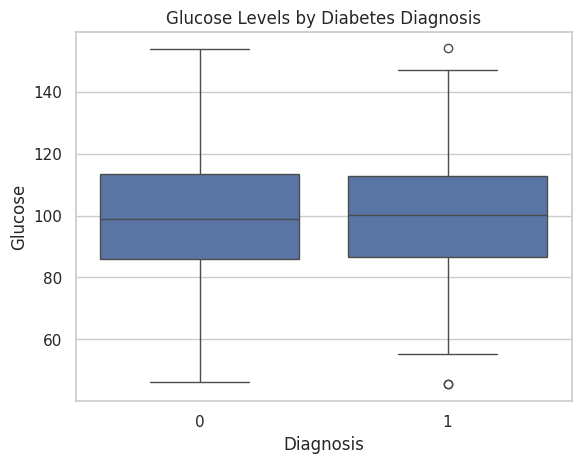

In [61]:
sns.boxplot(x='Diagnosis', y='Glucose', data=df_clean)
plt.title('Glucose Levels by Diabetes Diagnosis')
plt.show()


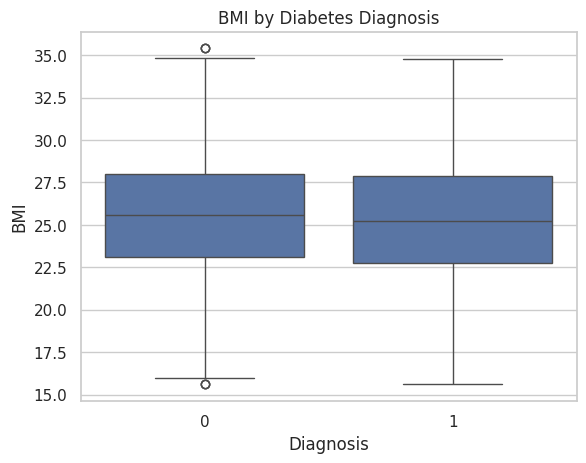

In [62]:
sns.boxplot(x='Diagnosis', y='BMI', data=df_clean)
plt.title('BMI by Diabetes Diagnosis')
plt.show()


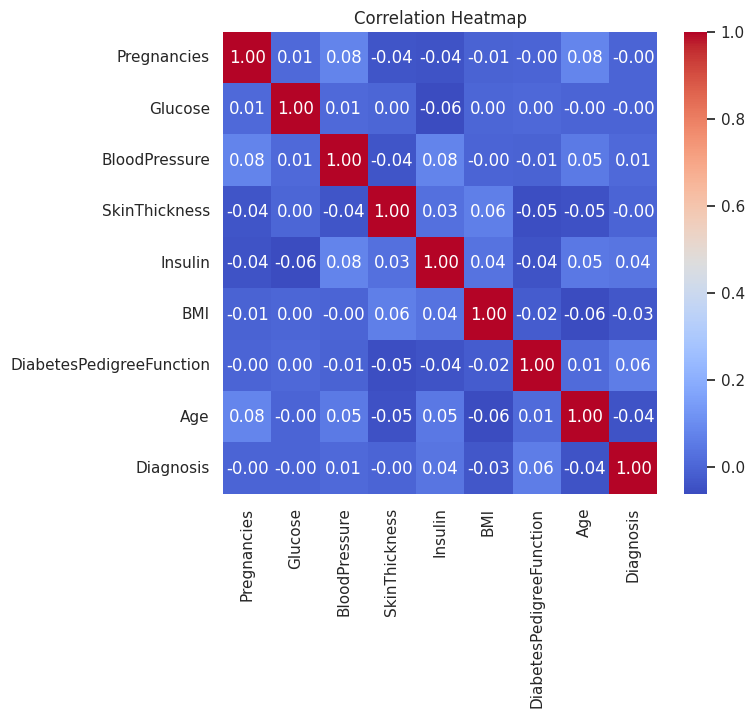

In [63]:
plt.figure(figsize=(7, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Exploratory Data Analysis Insights

- Glucose levels tend to be **slightly higher** among diabetic patients compared to non-diabetic patients, though there is **substantial overlap** between the two groups.
- BMI distributions for diabetic and non-diabetic patients are **very similar**, suggesting BMI alone may not strongly differentiate diagnosis in this dataset.
- Insulin values show **high variability and right-skewness**, even after cleaning, indicating the presence of extreme values.
- Age shows a **weak positive association** with diabetes diagnosis, with diabetic patients tending to be slightly older on average.
- Correlation analysis indicates that **no single feature has a strong linear relationship** with diabetes diagnosis; most correlations are weak.
- The dataset shows **class imbalance**, with non-diabetic patients forming the majority of observations.


## Key Takeaways & Conclusion

- The dataset required cleaning due to unrealistic negative values in certain features.
- Exploratory analysis showed that glucose levels and age tend to be slightly higher among diabetic patients.
- Most features show weak linear correlation with diabetes diagnosis, highlighting the complexity of the condition.
- Insulin levels exhibit high variability, suggesting the need for careful handling in further analysis or modeling.
- This project demonstrates a structured approach to data cleaning, visualization, and insight generation using Python.